# **Image classifier - Numbers data set**

In this exercise we are going to revise differents **NN models for Image Classifier**. 

We are using the `mnist` data set, that contains numbers written by hand. Our goal is to develop a model based on this data set that can identify the numbers ( 0 to 9 ).


Import the libraries and load the data:

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np


data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

- `data`: contains the MNIST dataset, loaded in `(image, label)` and it is divided in train and test.
  
- `metadata`: holds metadata about the dataset, such as the number of samples in the training and test sets.


In [2]:
#The following objets are 'TF DataSets'. They are iterable objects, so we need a bucle to consult the data.
data_train = data['train']
data_test = data['test']


In order to improve the speed and effectiveness of the model, we are normalizing the data:

In [3]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)  # cast converts pixel values to float (they usually are in uint8 format where 0 represents black and 255 white)
    images = images / 255  # Normalize pixel values to the range [0, 1]
    return images, labels

data_train = data_train.map(normalize)
data_test = data_test.map(normalize)

# Add caching (use memory instead of disk for faster training)
data_train = data_train.cache()
data_test = data_test.cache()

# Define the classes (digits 0-9)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Let see how our data looks like:

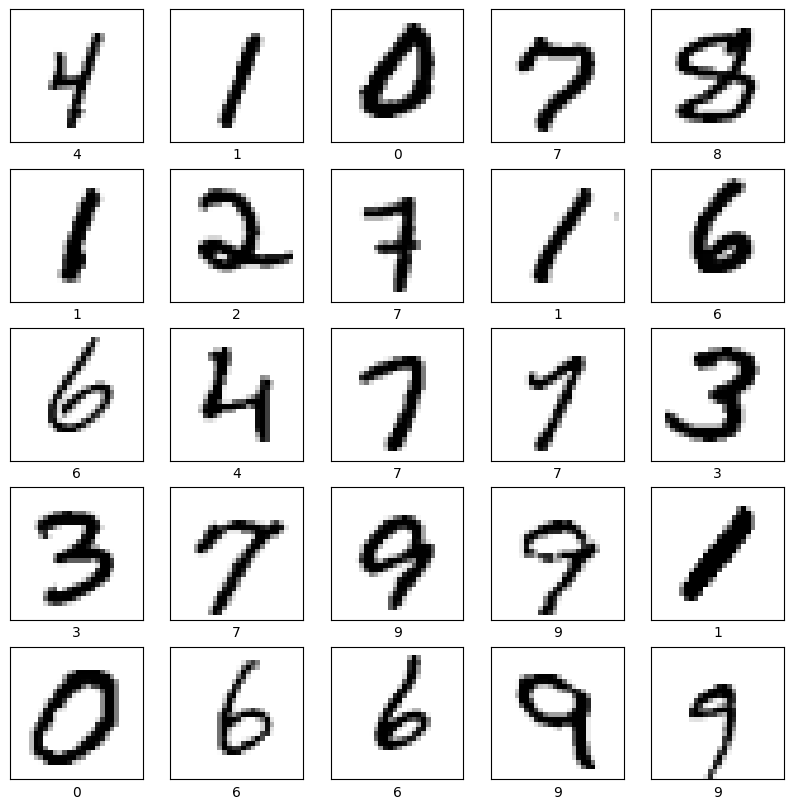

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(data_train.take(25)): #with enumerate we obtain an iterable object composed of tuples ('cardinal number' and sample)
    image = image.numpy().reshape((28,28)) 
    #image was a 'tensor', but we have to convert it into 'numpy array' to visualize it. We also make sure the dimension is 28*28 pixels
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(classes[label])

plt.show()  

Once we have seen some data, let's make a first model

## First model: **Dense NN**

In [5]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # We take a 28x28 tensor in the input and make it flat. The '1' stands for black and white.
    
    #We use two dense layers with 50 neurons and the act_function = relu, that trains faster and works similar to 'signoid'.
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax') 
    #Knowing that we have 10 classes, 'softmax' is the probability that the input corresponds to each class.
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

C:\Users\emaie\Desktop\Porfolio2024\entorno\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We use the `Sparse Categorical Crossentropy` to compute the loss because we are in a classification problem with multiple classes that are integer numbers. 

NOTE: Categorical Crossentropy is used when we have 'one-hot vectors'.

In [6]:
len_data_train = metadata.splits["train"].num_examples
len_data_test = metadata.splits["test"].num_examples


batch_size=32
data_train = data_train.repeat().shuffle(len_data_train).batch(batch_size)
data_test = data_test.batch(batch_size)

The model will process 32 examples at a time in each training step, helping the training. Also we use `repeat()`, that makes the dataset repeat indefinitely (it does not 'store infinite data' but rather behaves like an iterator) , ensuring there are always data available during training and `shuffle` that randomly shuffles the data.

In [7]:
import math

history = model.fit(
    data_train,
    epochs=60, #the model will see the entire training set 60 times.
    steps_per_epoch=math.ceil(len_data_train/batch_size) #we give the model the steps
)

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8525 - loss: 0.5140
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9570 - loss: 0.1478
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1076
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9747 - loss: 0.0824
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0662
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0583
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0516
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9867 - loss: 0.0426
Epoch 9/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0396
Epoch 10/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9892 - loss: 0.0336
Epoch 11/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0305
Epoch 12/60
1875/1875 ━━━━━━━━

Now we evaluate the model:

In [8]:
loss, accuracy = model.evaluate(data_test)

print('Accuracy in the test set is: {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.1973
Accuracy in the test set is: 0.9750000238418579


This performance seems to be really good. 

**However**, the problem is that the **test set is really similar to the train set**. Let's modify a little bit the images and see what happen:

### **Distort image**

Now we copy the functions developed in `Image_distortion`:

In [14]:
from scipy import ndimage as ndi

In [64]:
import numpy as np
import scipy.ndimage as ndi
import tensorflow as tf

def scale(foto, s_x, s_y):
    mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])
    img = ndi.affine_transform(foto, mat_scale, cval=0, order=1)  # cval=1 ensures white, order=1 improves interpolation
    return img

def rotation(foto, theta):
    w, h = foto.shape
    mat_rotate = (
        np.array([[1, 0, w / 2], [0, 1, h / 2], [0, 0, 1]])
        @ np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
        @ np.array([[1, 0, -w / 2], [0, 1, -h / 2], [0, 0, 1]])
    )
    img = ndi.affine_transform(foto, mat_rotate, cval=0, order=1)  # cval=1 ensures white
    return img

def shear(foto, lambda1):
    mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
    img = ndi.affine_transform(foto, mat_shear, cval=0, order=1)  # cval=1 ensures white
    return img

def distortion(foto):  # foto is a tensorflow image
    foto = foto.numpy().reshape((28, 28))
    
    s_x = np.random.uniform(0.9, 1.6)
    s_y = np.random.uniform(0.9, 1.6)
    theta = np.random.uniform(-0.4, 0.4)
    lambda1 = np.random.uniform(-0.1, 0.1)

    foto1 = scale(foto, s_x, s_y)
    foto2 = rotation(foto1, theta)
    foto3 = shear(foto2, lambda1)
    foto3 = foto3.reshape((28, 28, 1))

    foto3 = np.clip(foto3, 0, 1)  # Ensure values are between 0 and 1 for proper grayscale

    img = tf.convert_to_tensor(foto3)
    return img


And we define the new data set:

In [65]:
dif_data_test = data['test'] #difficult data_test
dif_data_test = dif_data_test.map(normalize)
dif_data_test = dif_data_test.cache()

def apply_distortion(x, y):
    distorted_x = tf.py_function(func=distortion, inp=[x], Tout=tf.float32)
    distorted_x.set_shape(x.shape)
    return distorted_x, y

dif_data_test = dif_data_test.map(apply_distortion)


Let's see our new data:

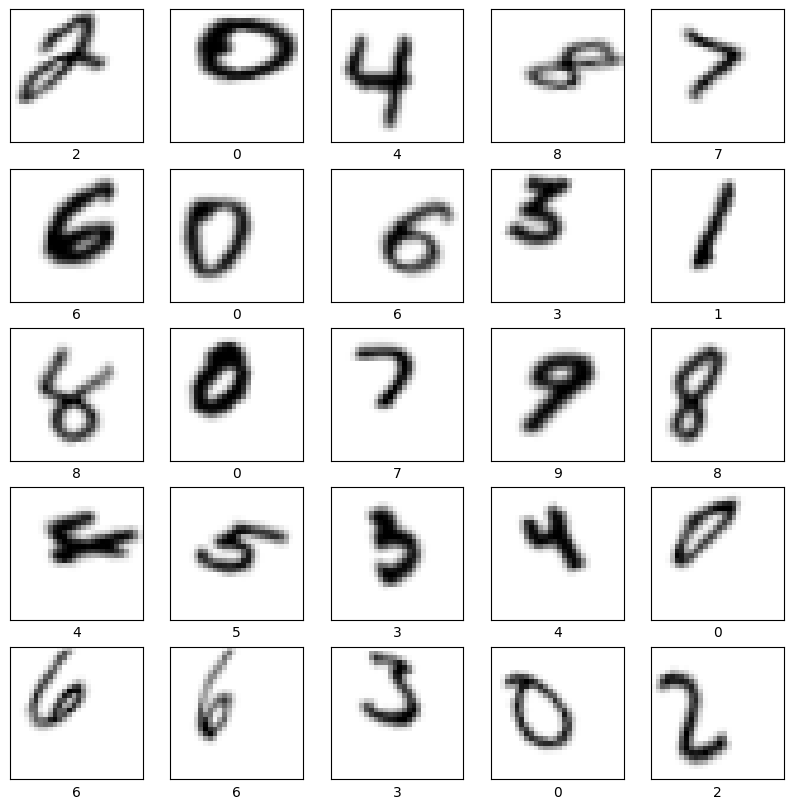

In [66]:
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(dif_data_test.take(25)): #with enumerate we obtain an iterable object composed of tuples ('cardinal number' and sample)
    image = image.numpy().reshape((28,28)) 
    #image was a 'tensor', but we have to convert it into 'numpy array' to visualize it. We also make sure the dimension is 28*28 pixels
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(classes[label])

plt.show()  

If we now test our model with this new data set:

In [67]:

dif_data_test = dif_data_test.batch(batch_size) #remember

loss, accuracy = model.evaluate(dif_data_test)

print('Accuracy in the difficult test set is: {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.3221 - loss: 14.1163
Accuracy in the difficult test set is: 0.32420000433921814


## Second model: **Convolutional Neural Networks (CNN)**

In [69]:
model2 = tf.keras.Sequential([

    #Now, our first layer will be a convolutional layer that will detect the 'axes' of the image. We do not indicate the number of neurons but the 
    #number of kernels (will adjust the values of the boxes of the 32 kernels automatically).
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),

    #The pooling layer has two important functions: to reduce the image size and to highlight important features.
    tf.keras.layers.MaxPooling2D(2,2), #(2,2) is the size of our matrix
    
    #The further we go in the network, the smaller the images become by the pooling layers, 
    #therefore we can add more filters in the convolution layers.

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    #Now we have to convert our square image result in a simple vector that can manage the dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history2 = model2.fit(
    data_train,
    epochs=10, #the model will see the entire training set 10 times.
    steps_per_epoch=math.ceil(len_data_train/batch_size)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9084 - loss: 0.3058
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9854 - loss: 0.0448
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9908 - loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0.0226
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9951 - loss: 0.0155
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9957 - loss: 0.0130
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9975 - loss: 0.0085
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9969 - loss: 0.0090
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9976 - loss: 0.0070


We can see the new model train slower but much better. Let's see How it works with the new test set:

In [72]:
loss, accuracy = model2.evaluate(data_test)

print('Accuracy in the test set is: {}'.format(accuracy))

loss, accuracy = model2.evaluate(dif_data_test)

print('Accuracy in the difficult test set is: {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0303
Accuracy in the test set is: 0.9922000169754028
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4553 - loss: 4.3611
Accuracy in the difficult test set is: 0.4544999897480011


The performance in the difficult test set is still really bad, we can do it better:

## Final model: **CNN with Dropout and improving the data set:**

Finally we are going to modify a little bit more the model, adding more convolutional layers and a **dropout** layer. 

Dropout works by randomly "turning off" a percentage of neurons during training at each forward propagation step. It is often used **after dense layers** so that the network does not depend on specific neurons **or after convolutional or pooling layers** to make feature extraction more robust.

In addition, we are going to apply the distortion to the training data in order to make our data set better.

In [73]:
#Improve data set:
data_train_pro = data['train']
data_train_pro = data_train_pro.map(normalize)
data_train_pro = data_train_pro.cache()

data_train_pro = data_train_pro.map(apply_distortion)

data_train_pro = data_train_pro.repeat().shuffle(len_data_train).batch(batch_size)

In [74]:
model3 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    # We add another convolutional layer
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    #Here we put the Dropout, with a ratio = 0.4 
    tf.keras.layers.Dropout(0.4),

    # Capa de salida
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entrenar el modelo
history3 = model3.fit(
    data_train_pro,
    epochs=10,
    steps_per_epoch=math.ceil(len_data_train/batch_size)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 24ms/step - accuracy: 0.6861 - loss: 0.9277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9293 - loss: 0.2346
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9473 - loss: 0.1714
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9595 - loss: 0.1356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9637 - loss: 0.1254
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9664 - loss: 0.1112
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9697 - loss: 0.1023
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9700 - loss: 0.0967
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9723 - loss: 0.0931
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9739 - loss: 0.0884


We have seen our model last much more in the training step. Let's see how it perfoms with the test sets:

In [75]:
loss, accuracy = model3.evaluate(data_test)

print('Accuracy in the test set for the "last model" is: {}'.format(accuracy))

loss, accuracy = model3.evaluate(dif_data_test)

print('Accuracy in the difficult test set for the "last model" is: {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0797
Accuracy in the test set for the "last model" is: 0.9764999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9787 - loss: 0.0722
Accuracy in the difficult test set for the "last model" is: 0.9779999852180481


We can see performs even better in the `difficult test set`. 

To end the project, let see all the accuracies for the three models together:

In [76]:
loss1, accuracy1 = model.evaluate(data_test)
loss2, accuracy2 = model2.evaluate(data_test)
loss3, accuracy3 = model3.evaluate(data_test)

print('Accuracy in the test set is: {}, {} and {} for the first, second and final model resp.'.format(accuracy1,accuracy2,accuracy3))

loss1, accuracy1 = model.evaluate(dif_data_test)
loss2, accuracy2 = model2.evaluate(dif_data_test)
loss3, accuracy3 = model3.evaluate(dif_data_test)

print('And the accuracy in the difficult test set is: {}, {} and {} for the first, second and final model resp.'.format(accuracy1,accuracy2,accuracy3))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.1973
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0797
Accuracy in the test set is: 0.9750000238418579, 0.9922000169754028 and 0.9764999747276306 for the first, second and final model resp.
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3253 - loss: 14.1993
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4619 - loss: 4.2973
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9745 - loss: 0.0787
And the accuracy in the difficult test set is: 0.3239000141620636, 0.45419999957084656 and 0.9757000207901001 for the first, second and final model resp.


### **Conclusions**

Throughout this exercise we have been able to go through the construction, training and testing of three neural networks:

- The simplest was a dense neural network, which trained very quickly and is easy to understand. It fit well to the data provided by the data set but when these were slightly modified it had very little precision.

- The second network incorporated convolutional and pooling layers. The training was a little slower but it fit the data in earlier stages than the dense network. However, it still did not fit the 'difficult' data well.

- Finally, the last neural network added more convolutional layers and the dropout, improving the robustness of the network. In addition, we modified the training data, obtaining a magnificent performance in both data_test and dif_data_test.

Therefore, the most important conclusion we can reach is that, by understanding the data and how the different layers and tools we have work, we can improve neural networks to be faster and more efficient.